In [1]:
import nltk
import spacy


In [2]:
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


In [3]:
df = pd.read_csv(r"E:\New folder\training.1600000.processed.noemoticon.csv", encoding='iso-8859-1')


In [4]:
df.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
df=df.drop(["id of the tweet",'date of the tweet',"query","user"],axis=1)

In [6]:
df.head()

,polarity of tweet,text of the tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [7]:
df.isnull().sum()

polarity of tweet     0
text of the tweet     0
dtype: int64

In [8]:
df.columns=["Sentiment","Text"]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1048572 non-null  int64 
 1   Text       1048572 non-null  object
dtypes: int64(1), object(1)
memory usage: 16.0+ MB


In [10]:
df.describe()

,Sentiment
count,1.048572e+06
mean,9.482458e-01
std,1.701122e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,4.000000e+00


In [11]:
df["Sentiment"].value_counts()

0    799996
4    248576
Name: Sentiment, dtype: int64

In [12]:
import seaborn as sns

<Axes: xlabel='Sentiment', ylabel='count'>

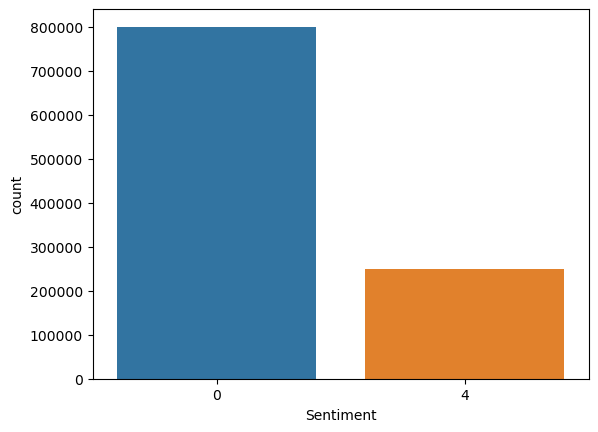

In [13]:
sns.countplot(data=df,x="Sentiment")

In [14]:
Sample=2480
Sentiment_neg=df[df["Sentiment"]==0].sample(Sample,random_state=0)
Sentiment_pos=df[df["Sentiment"]==4].sample(Sample,random_state=0)

In [15]:
Sentiment_neg

,Sentiment,Text
158171,0,"well im calling it a night , its kinda early b..."
480076,0,says umuulan ng malakas.. huhu.. i really don...
258275,0,I though I was getting better but I'm not. I'm...
20237,0,sipping coffee and counting todays chores
773976,0,@CoachDeb Never seen that error before. Sorry ...
...,...,...
537443,0,did not have a good day today!!
782521,0,Twittering in my bed xD | Someone made me yes...
539115,0,"@andyrose29 You've prolly tried everything, bu..."
420370,0,i'm bored &amp; apparently everyone hates me ...


In [16]:
Sentiment_pos

,Sentiment,Text
973649,4,@sheischristy well for what its worth I HOPE U...
823511,4,going to eat Lunch. be back in a sec.ï¿½
910872,4,http://twitpic.com/4wah5 - haha that's right
951156,4,I really want to watch Donnie Darko now! Anyon...
914338,4,Christian doesn't have a Twitter...But he has ...
...,...,...
893950,4,@jessewilkins Lemme know how it goes! I sit fo...
982907,4,@IvyBean104 Have a lovely day Ivy
995285,4,&quot;Do what makes you happy ... be with who ...
820557,4,@LucyLovesJBx Hhaha i no i cn't wait for it t...


In [17]:
balanced_df=pd.concat(["Sentiment_neg","Sentiment_pos"],axis=0)

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [18]:
type(Sentiment_pos)

pandas.core.frame.DataFrame

In [19]:
type(Sentiment_neg)

pandas.core.frame.DataFrame

In [20]:
dir(df)

['Sentiment',
 'T',
 'Text',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__re

In [21]:
final_df=Sentiment_pos.append(Sentiment_neg)

C:\Users\HOME\AppData\Local\Temp\ipykernel_12960\2874345846.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=Sentiment_pos.append(Sentiment_neg)


In [22]:
final_df

,Sentiment,Text
973649,4,@sheischristy well for what its worth I HOPE U...
823511,4,going to eat Lunch. be back in a sec.ï¿½
910872,4,http://twitpic.com/4wah5 - haha that's right
951156,4,I really want to watch Donnie Darko now! Anyon...
914338,4,Christian doesn't have a Twitter...But he has ...
...,...,...
537443,0,did not have a good day today!!
782521,0,Twittering in my bed xD | Someone made me yes...
539115,0,"@andyrose29 You've prolly tried everything, bu..."
420370,0,i'm bored &amp; apparently everyone hates me ...


In [23]:
final_df["Sentiment"].value_counts()

4    2480
0    2480
Name: Sentiment, dtype: int64

In [24]:
len(final_df.index)

4960

In [25]:
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [26]:
wordnet=WordNetLemmatizer()
corpus=[]
for i in range(len(final_df.index)):
    review=re.sub("[^A-Za-z]"," ",final_df.Text.iloc[i])
    review=review.lower()
    review=review.split()
    lemmatized_review=[]
    for word in review:
        if word not in set(stopwords.words("english")):
            lemmatized_review.append(wordnet.lemmatize(word))
    review=" ".join(lemmatized_review)
    corpus.append(review)

In [27]:
corpus

['sheischristy well worth hope u feel better',
 'going eat lunch back sec',
 'http twitpic com wah haha right',
 'really want watch donnie darko anyone wanna lend dvd pleaseeeee',
 'christian twitter cell phone hahah bored',
 'rdbones lybo laughing butt',
 'imogenheap thank making life altering music immi',
 'think need day sans boyfriend gonna kill',
 'houseofjenny actually fit perfectly keeping though intrigued small animal idea',
 'started new moon bloody good',
 'stuartdavis c mon talking philos ophy love wisdom need quot mat quot context intersubjectively quot ground quot',
 'alphahydroxy favorite favorite',
 'little man bought first cd johnny cash heard quot tennessee stud quot jackie brown soundtrack hooked',
 'six jus let know u roll deep f ill fill inbox w penis enlargement spam lol tell yo moma wuz',
 'okay new jonas episode awesome',
 'sat starbucks breakfast fruit bread amp vanilla latte heaven x',
 'dieting work hurrah weigh kg may tiny whatevs almost au size',
 'good morn

In [28]:
final_df['preprocessed_text']=corpus

In [29]:
final_df.head()

,Sentiment,Text,preprocessed_text
973649,4,@sheischristy well for what its worth I HOPE U...,sheischristy well worth hope u feel better
823511,4,going to eat Lunch. be back in a sec.ï¿½,going eat lunch back sec
910872,4,http://twitpic.com/4wah5 - haha that's right,http twitpic com wah haha right
951156,4,I really want to watch Donnie Darko now! Anyon...,really want watch donnie darko anyone wanna le...
914338,4,Christian doesn't have a Twitter...But he has ...,christian twitter cell phone hahah bored


In [30]:
final_df['preprocessed_text'].array

<PandasArray>
[                                                         'sheischristy well worth hope u feel better',
                                                                            'going eat lunch back sec',
                                                                     'http twitpic com wah haha right',
                                     'really want watch donnie darko anyone wanna lend dvd pleaseeeee',
                                                            'christian twitter cell phone hahah bored',
                                                                          'rdbones lybo laughing butt',
                                                    'imogenheap thank making life altering music immi',
                                                            'think need day sans boyfriend gonna kill',
                      'houseofjenny actually fit perfectly keeping though intrigued small animal idea',
                                                  

In [31]:
final_df=final_df.drop(["Text"],axis=1)

In [32]:
final_df

,Sentiment,preprocessed_text
973649,4,sheischristy well worth hope u feel better
823511,4,going eat lunch back sec
910872,4,http twitpic com wah haha right
951156,4,really want watch donnie darko anyone wanna le...
914338,4,christian twitter cell phone hahah bored
...,...,...
537443,0,good day today
782521,0,twittering bed xd someone made yesterday confused
539115,0,andyrose prolly tried everything thinking u co...
420370,0,bored amp apparently everyone hate tonight


In [33]:
X=final_df["preprocessed_text"].values
y=final_df["Sentiment"].values

In [34]:
X

array(['sheischristy well worth hope u feel better',
       'going eat lunch back sec', 'http twitpic com wah haha right', ...,
       'andyrose prolly tried everything thinking u could try herbal remedy homeopathic medicine worth shot',
       'bored amp apparently everyone hate tonight',
       'problem solving people india phone'], dtype=object)

In [35]:
y

array([4, 4, 4, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
cv=CountVectorizer()

In [38]:
X_cv=cv.fit_transform(X).toarray()

In [39]:
X_cv.shape

(4960, 10304)

In [40]:
y.shape

(4960,)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_cv,y,random_state=0,test_size=0.2)

In [42]:
X_train.shape

(3968, 10304)

In [43]:
X_test.shape

(992, 10304)

In [44]:
y_train.shape

(3968,)

In [45]:
y_test

array([0, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 4, 4, 0, 0, 4, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4,
       0, 0, 4, 4, 4, 0, 4, 0, 0, 0, 4, 4, 4, 0, 4, 0, 0, 0, 4, 0, 0, 0,
       4, 0, 0, 0, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4,
       0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 0, 0, 4, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       4, 4, 0, 0, 4, 0, 4, 0, 4, 4, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 4, 4, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 4, 4, 4, 0, 4, 4, 0, 4,
       4, 4, 4, 0, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4,
       0, 4, 0, 0, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 4, 0,
       4, 0, 0, 0, 4, 0, 4, 0, 4, 0, 0, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4,
       0, 0, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4,
       4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [47]:
pipe=Pipeline([("Support Vector",SVC())])

In [48]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Support Vector', SVC())])

In [49]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [51]:
y_pred=pipe.predict(X_test)

In [52]:
Accuracy=accuracy_score(y_test,y_pred)

In [53]:
Accuracy

0.6985887096774194

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lg=LinearRegression()

In [56]:
lg.fit(X_train,y_train)

LinearRegression()

In [57]:
y_pred1=lg.predict(X_test)

In [58]:
Accuracy_1=accuracy_score(y_pred,y_test)
Accuracy_1

0.6985887096774194

In [59]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.63      0.68       498
           4       0.67      0.76      0.72       494

    accuracy                           0.70       992
   macro avg       0.70      0.70      0.70       992
weighted avg       0.70      0.70      0.70       992



In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
tf=TfidfVectorizer()

In [62]:
X_tf = tf.fit_transform(corpus).toarray()

In [63]:
from sklearn.model_selection import train_test_split
X_train_,X_test_,y_train_,y_test_=train_test_split(X_tf,y,random_state=0,test_size=0.2)

In [64]:
pipe.fit(X_train_,y_train_)

Pipeline(steps=[('Support Vector', SVC())])

In [65]:
y_pred_=pipe.predict(X_test_)

In [66]:
Accuracy=accuracy_score(y_test_,y_pred_)
Accuracy

0.7157258064516129

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lg_=LogisticRegression()

In [69]:
lg_.fit(X_train_,y_train_)

LogisticRegression()

In [70]:
y_pred__=lg_.predict(X_test_)

In [71]:
Accuracy=accuracy_score(y_test_,y_pred__)
Accuracy

0.7167338709677419

In [72]:
from pycaret.classification import *

In [73]:
best=setup(data=final_df,target="Sentiment")

,Description,Value
0,Session id,8781
1,Target,Sentiment
2,Target type,Binary
3,Target mapping,"0: 0, 4: 1"
4,Original data shape,"(4960, 2)"
5,Transformed data shape,"(4960, 2)"
6,Transformed train set shape,"(3472, 2)"
7,Transformed test set shape,"(1488, 2)"
8,Categorical features,1
9,Preprocess,True


In [74]:
best_models=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5020,0.5017,0.1012,0.2499,0.0688,0.0029,0.0238,0.1670
qda,Quadratic Discriminant Analysis,0.5020,0.5017,0.1012,0.2499,0.0688,0.0029,0.0238,0.1580
svm,SVM - Linear Kernel,0.5012,0.0000,0.0012,0.2000,0.0023,0.0023,0.0184,0.1540
et,Extra Trees Classifier,0.5012,0.5017,0.0012,0.2000,0.0023,0.0023,0.0184,0.6570
xgboost,Extreme Gradient Boosting,0.5012,0.5012,0.0012,0.2000,0.0023,0.0023,0.0184,0.2480
knn,K Neighbors Classifier,0.4997,0.5009,0.3000,0.1497,0.1997,0.0017,0.0130,0.3080
dt,Decision Tree Classifier,0.4997,0.5009,0.3000,0.1497,0.1997,0.0017,0.0130,0.1460
rf,Random Forest Classifier,0.4997,0.5009,0.3000,0.1497,0.1997,0.0017,0.0130,0.7320
ada,Ada Boost Classifier,0.4997,0.5009,0.3000,0.1497,0.1997,0.0017,0.0130,0.1690
gbc,Gradient Boosting Classifier,0.4997,0.5009,0.3000,0.1497,0.1997,0.0017,0.0130,0.4970


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [75]:
print(best_models)

GaussianNB(priors=None, var_smoothing=1e-09)


In [79]:
from sklearn.naive_bayes import GaussianNB

In [86]:
GNB=GaussianNB()

In [87]:
GNB.fit(X_train_,y_train_)

GaussianNB(priors=None, var_smoothing=1e-09)

In [88]:
y_pred_p=GNB.predict(X_test_)

In [89]:
accuracy_score(y_test_,y_pred_p)

0.5766129032258065